### <H1>Data cleaning</h1>

In [365]:
import pandas as pd
import numpy as np
df = pd.read_csv("Car_Insurance_Claim.csv")
df.dropna()
df.columns = df.columns.str.lower().str.replace(' ', '_')
for i in df.columns:
    df[i] = df[i].replace('none', np.nan)
    df[i] = df[i].fillna(df[i].mode()[0])
    if type(df[i])==str:
        df[i] = df[i].str.strip()
        df[i] = df[i].str.replace(r'\d+', '', regex=True)
del df['unnamed:_0']
list_int_cols = ['credit_score','id', 'vehicle_ownership', 'married', 'children', 'postal_code', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome']
for i in list_int_cols:
    df[i] = pd.to_numeric(df[i], errors='coerce')
df

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238.0,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,high school,poverty,0.357757,0.0,before 2015,0.0,0.0,10238.0,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238.0,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765.0,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,high school,working class,0.388366,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238.0,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,high school,middle class,0.522231,1.0,after 2015,0.0,1.0,32765.0,11000.0,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238.0,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238.0,13000.0,sedan,2,0,1,1.0


### <h1>Descriptive Statistic and Data Visualization</h1>

In [366]:
print(df.describe(), end='')

                  id  credit_score  vehicle_ownership       married  \
count   10000.000000  10000.000000       10000.000000  10000.000000   
mean   500521.906800      0.466240           0.700700      0.493000   
std    290030.768758      0.193305           0.457974      0.499976   
min       101.000000      0.053358           0.000000      0.000000   
25%    249638.500000      0.368799           0.000000      0.000000   
50%    501777.000000      0.502621           1.000000      0.000000   
75%    753974.500000      0.606510           1.000000      1.000000   
max    999976.000000      0.960819           1.000000      1.000000   

           children   postal_code  annual_mileage  speeding_violations  \
count  10000.000000  10000.000000    10000.000000          10000.00000   
mean       0.691500  19779.166600    11625.100000              1.46710   
std        0.461897  18869.452149     2676.876268              2.23379   
min        0.000000  10238.000000     2000.000000              0

In [367]:
print(df['gender'].value_counts(), end='')
print(df['vehicle_type'].value_counts(), end='')
print(df['race'].value_counts(), end='')
print(df['education'].value_counts(), end='')
print(df['driving_experience'].value_counts(), end='')

gender
female    5067
male      4933
Name: count, dtype: int64vehicle_type
sedan         9531
sports car     469
Name: count, dtype: int64race
majority    9018
minority     982
Name: count, dtype: int64education
high school    6112
university     3888
Name: count, dtype: int64driving_experience
0-9y      3603
10-19y    3264
20-29y    2093
30y+      1040
Name: count, dtype: int64

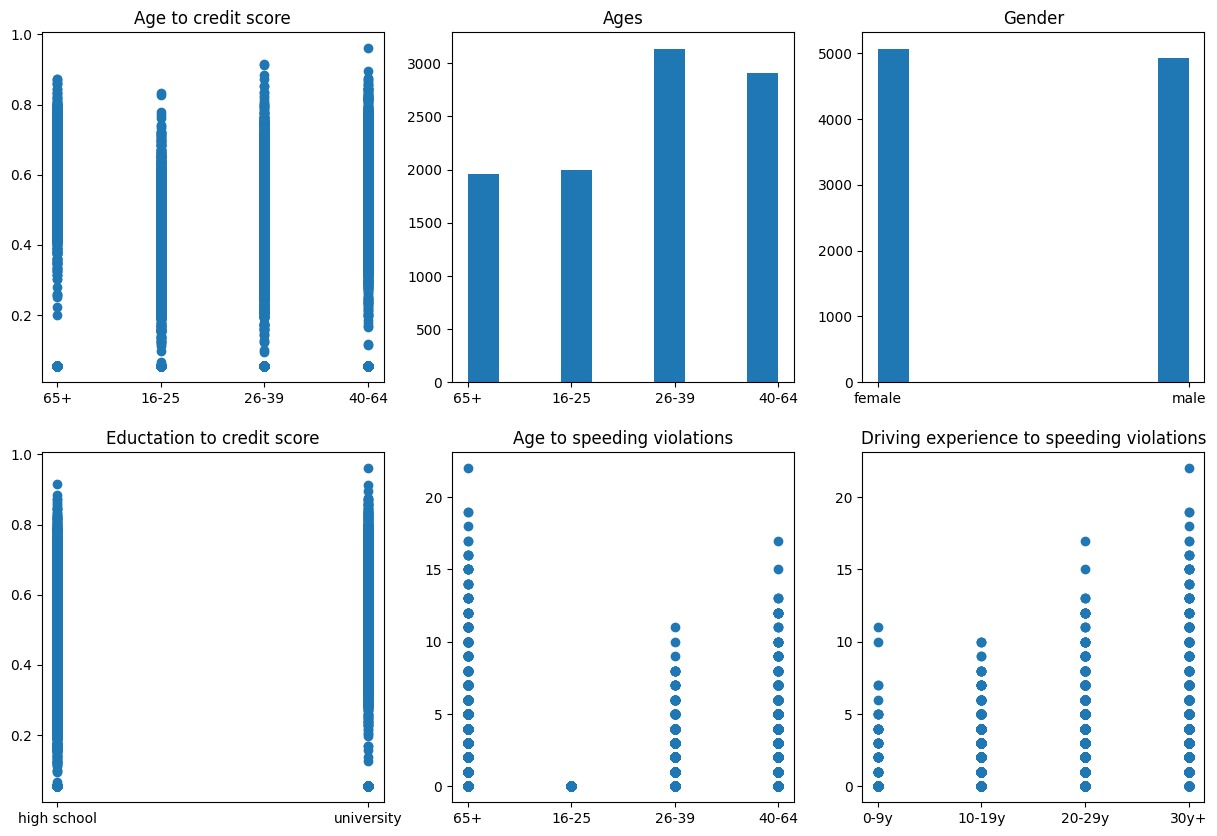

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)
ax1.scatter(df['age'], df['credit_score'])
ax1.set_title('Age to credit score')
ax2.hist(df['age'])
ax2.set_title('Ages')
ax3.hist(df['gender'])
ax3.set_title('Gender')
ax4.scatter(df['education'], df['credit_score'])
ax4.set_title('Eductation to credit score')
ax5.scatter(df['age'], df['speeding_violations'])
ax5.set_title('Age to speeding violations')
ax6.scatter(df['driving_experience'], df['speeding_violations'])
ax6.set_title('Driving experience to speeding violations')
plt.show()

<Axes: >

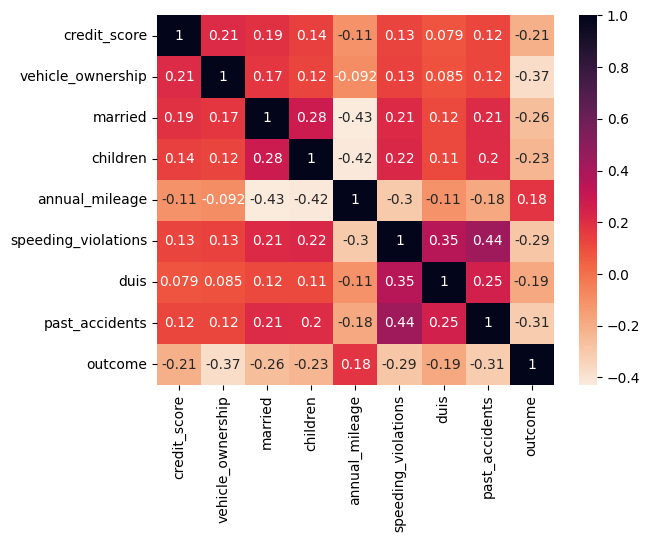

In [369]:
corr = df.iloc[:,[7,8,10,11,13,15,16,17,18]].corr()
sns.heatmap(corr, annot=True, cmap='rocket_r')

### <h1>Conclusion</h1>

In the Exploratory Data Analysis (EDA) of the car insurance dataset, several steps were followed to understand and draw conclusions:

1. **Data Cleaning**: 
   The dataset was thoroughly cleaned to handle missing values, incorrect data types, and any outliers that could distort the analysis. Inconsistent or duplicate entries were also removed to ensure the dataset was accurate and ready for further analysis.

2. **Descriptive Statistics**:
   Basic statistics like mean, median, mode, and standard deviation were calculated for numerical features such as age, claim amount, and policy type. 

3. **Data Visualization**:
   Various visualization techniques such as histograms, box plots, and scatter plots were used to explore the relationship between features like age, occupation, and the likelihood of making a claim. Visualizations revealed patterns, such as certain age groups being more or less likely to make claims, or specific occupations showing a higher risk profile.

4. **Conclusions**:
   From the EDA, it became clear that age and occupation played significant roles in determining whether a claim was made. Younger individuals and those in higher-risk occupations were more likely to file claims. This insight allows the insurance company to refine its policies by targeting specific age groups or professions with tailored insurance offerings. Additionally, customers with a clean driving record or those with a longer history with the company showed a lower likelihood of making a claim, suggesting that loyalty and past behavior should be factored into future policy development.